<br/>
## Data Exploration
Exploratory analysis on Airbnb dataset to identify interesting phenomena 

#### Imports and Read in data

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict, OrderedDict
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train_users_path = '../../Data/train_users_2.csv'
train_users = pd.read_csv(train_users_path)
print(len(train_users))
train_users.head()

213451


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [11]:
sessions_csv_path = '../../Data/sessions.csv'
sessions = pd.read_csv(sessions_csv_path)
print(len(sessions))
sessions.head()

10567737


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [12]:
test_users_path = '../../Data/test_users.csv'
test_users = pd.read_csv(test_users_path)
print(len(test_users))
test_users.head()

62096


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


<br/>
### Bookings over Months, per Destination

In [13]:
from operator import itemgetter
import datetime
import dateutil.parser
from matplotlib.dates import MonthLocator, DateFormatter

def plotBookingsPerTime(train_booked):
    countries = set(train_booked['country_destination'])
    
    fig, ax = plt.subplots(figsize = (10,5))

    # Loop through each country 
    for country in countries:
        train_country = train_booked[train_booked['country_destination'] == country]
        
        c = Counter(train_country['date_first_booking'])
        dateList = sorted (c.items(), key = itemgetter(0))
        
        yearMonthDict = defaultdict(int)
        for (iso, val) in dateList:
            yearMonth = iso[:7]
            yearMonthDict[yearMonth] += val 
        yearMonthList = sorted (yearMonthDict.items(), key = itemgetter(0))
        
        dateList = []
        valList = []
        for (mon, val) in yearMonthList:
            dateList.append(dateutil.parser.parse(mon))
            valList.append(val)
            
        ax.plot_date(dateList, valList, '-')
           
    ax.xaxis.set_major_locator(MonthLocator(interval = 3))
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

    ax.fmt_xdata = DateFormatter('%Y-%m')
    fig.autofmt_xdate()
    plt.title('Airbnb bookings over Time, per Destination')
    plt.ylabel('Number of bookings')
    plt.xlabel('Date')
    plt.legend(list(countries))
    return plt

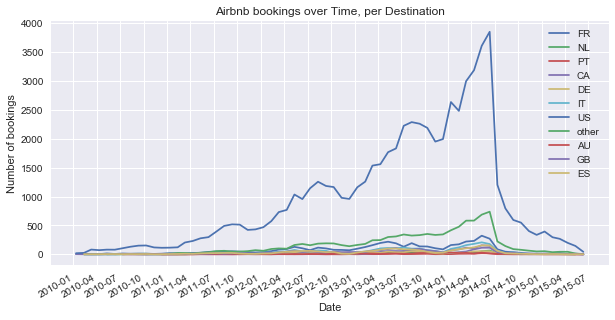

In [14]:
train_booked = train_users[train_users['country_destination'] != 'NDF']
bookingsPlot = plotBookingsPerTime(train_booked)
bookingsPlot.show()

#### Observations

- The number of US headed bookings dominate the rest of the countries (probably domestic travel, also supported by language data below).
- Usage increases over the years, but there also seems to be seasonal trends.
- A large drop happens around June/July 2014 - not clear why (perhaps a legal issue? https://en.wikipedia.org/wiki/Timeline_of_Airbnb)
- Booking patterns seem to be similar across different countries.

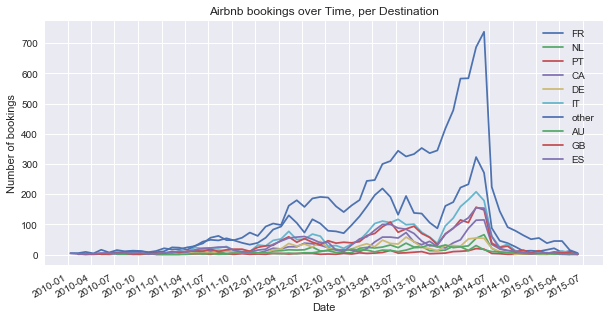

In [15]:
# Try again, but US is not included this time
train_booked = train_users[train_users['country_destination'] != 'NDF']
train_booked = train_booked[train_booked['country_destination'] != 'US']
bookingsPlot = plotBookingsPerTime(train_booked)
bookingsPlot.show()

#### Language Preferences

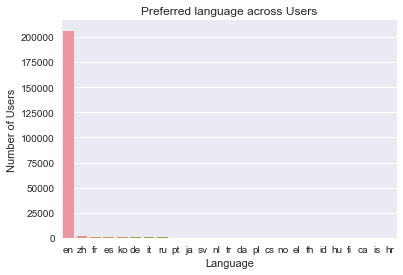

In [16]:
# Plot Languages
userLangs = OrderedDict(Counter(train_users['language']).most_common())
sns.barplot(x=userLangs.keys(), y=userLangs.values())
plt.title('Preferred language across Users')
plt.xlabel('Language')
plt.ylabel('Number of Users')
sns.despine()

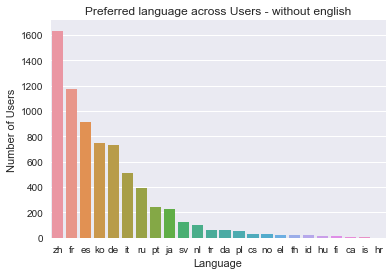

In [17]:
# Plot Languages WITHOUT en
userLangs = OrderedDict(Counter(train_users['language']).most_common())
del userLangs['en']
sns.barplot(x=userLangs.keys(), y=userLangs.values())
plt.title('Preferred language across Users - without english')
plt.xlabel('Language')
plt.ylabel('Number of Users')
sns.despine()

Most users have English as the preferred language - the user base seems to be mostly US. This partially explains the abundance of bookings with US as the destination. While we don't have the country of origin of these first-time users, it is likely that many of these are domestic travel.

<br/>
### Destination per Sign-up Method

/Users/arvind/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/arvind/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


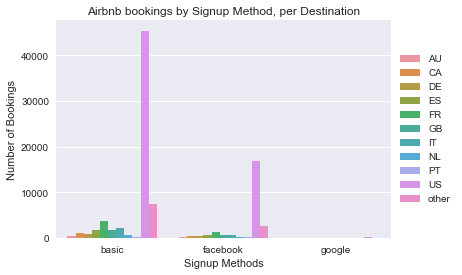

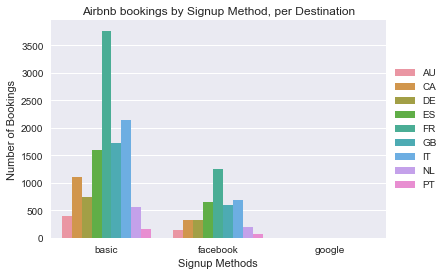

In [18]:
# append ones for counting ....
train_users['unit'] = np.ones(len(train_users))

# group by country, remove NDF
train_booked = train_users[train_users['country_destination'] != 'NDF']
signupDest = pd.DataFrame({'count' : train_booked.groupby(['signup_method','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['signup_method'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Signup Method, per Destination')
plt.xlabel('Signup Methods')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

# without US and other
plt.figure()
train_booked = train_booked[train_users['country_destination'] != 'US']
train_booked = train_booked[train_users['country_destination'] != 'other']
signupDest = pd.DataFrame({'count' : train_booked.groupby(['signup_method','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['signup_method'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Signup Method, per Destination')
plt.xlabel('Signup Methods')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

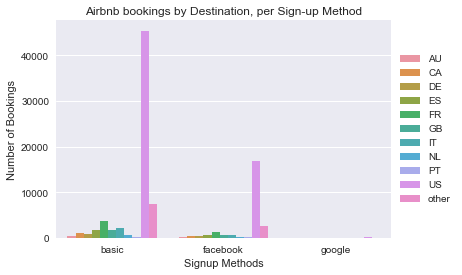

In [20]:
# Trying without NDF
train_booked = train_users[train_users['country_destination'] != 'NDF']
signupDest = pd.DataFrame({'count' : train_booked.groupby(['signup_method','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['signup_method'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Destination, per Sign-up Method')
plt.xlabel('Signup Methods')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

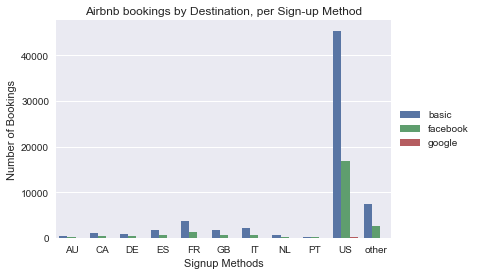

In [21]:
# Trying the opposite, for fun
train_booked = train_users[train_users['country_destination'] != 'NDF']
signupDest = pd.DataFrame({'count' : train_booked.groupby(['signup_method','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['country_destination'], y=signupDest['count'], hue=signupDest["signup_method"])
plt.title('Airbnb bookings by Destination, per Sign-up Method')
plt.xlabel('Signup Methods')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

Again, all of this only seems to re-emphasize the popularity of US as a destination. It seems the difficult task here may be how accurately we can predict the destination for the 'outliers' (i.e - non US destination bookings), especially in light of the NDCG evaluation metric suggested by the competition (https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings#evaluation), which will take into account the ordering of the given recommendations. Looking for features that may indicate higher chances of the other countries may be good.

<br/>
### Language Preference without US / NDF - (may be useful for third level)

In [30]:
#set(train_users['language'])

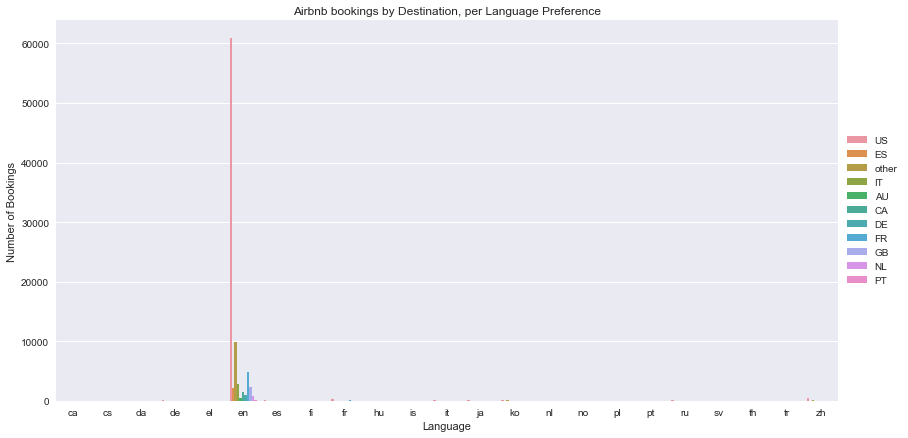

In [35]:
# Language check for NDF
#train_users_Non_EN = train_users[train_users['language'] != 'en']
#train_users_Non_EN = train_users[train_users_Non_EN['country_destination'] != 'US']
train_users_Non_EN = train_users[train_users['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_Non_EN.groupby(['language','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['language'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Destination, per Language Preference')
plt.xlabel('Language')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

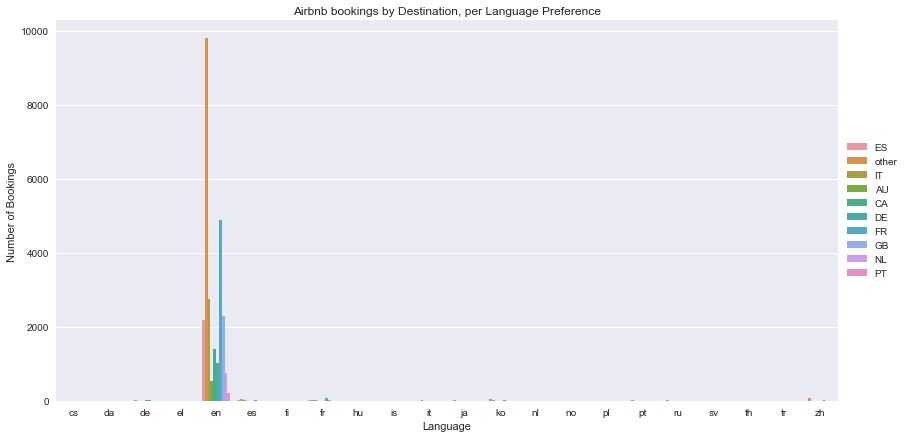

In [38]:
# Language check for NDF
train_users_Non_EN = train_users.copy()
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'US']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_Non_EN.groupby(['language','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['language'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Destination, per Language Preference')
plt.xlabel('Language')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

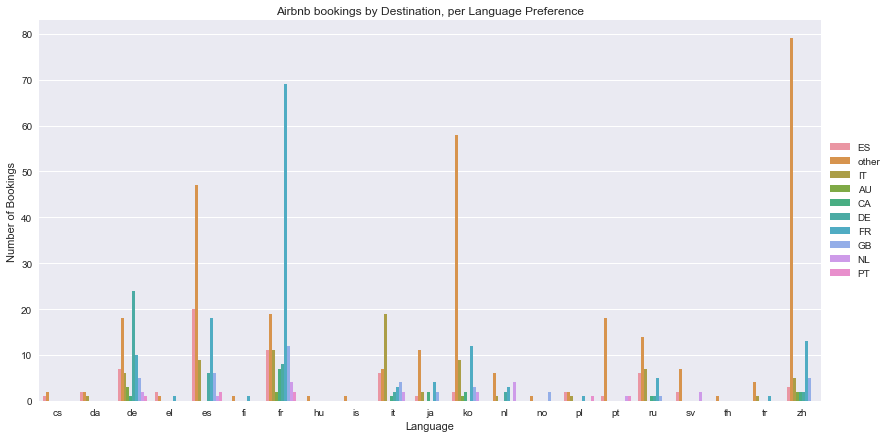

In [31]:
# Language check for NDF
train_users_Non_EN = train_users[train_users['language'] != 'en']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'US']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_Non_EN.groupby(['language','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['language'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Destination, per Language Preference')
plt.xlabel('Language')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

Looking at the user language may be helpful for Categorizing which Non-US country (and non-NDF), it may be helpful for second and third level. For example, 'fr' language users like to go to France the most, and 'de' users like to go to DE the most. 

In addition, users of languages that are in 'other' countries tend to go to 'other' countries. As an example, the majority of 'ko' language users go to 'other'. This may likely be Korean users going to Korea, which explains the higher count in 'other' for 'ko' users. Similar observations hold for other languages like 'ja', 'zh', 'sv', 'ru', etc. (Keep in mind that all users of this dataset are from the US.)

<br/>
###  Browser - doesn't seem too useful

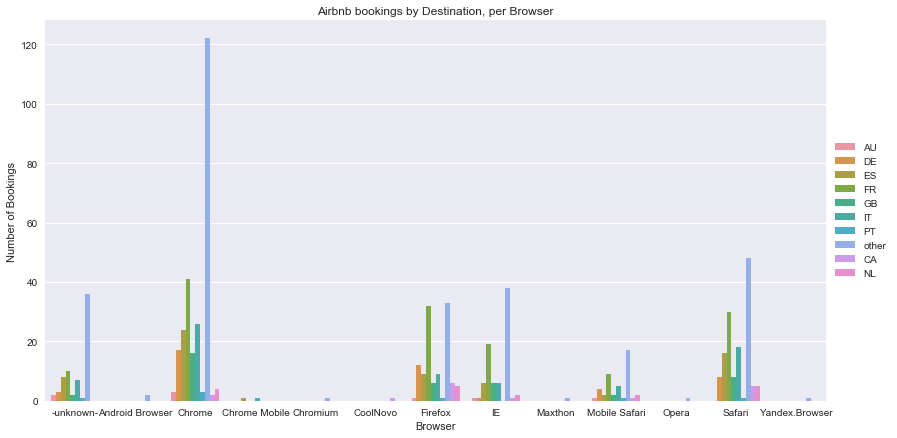

In [24]:
# Language check for NDF
train_users_Non_EN = train_users[train_users['language'] != 'en']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'US']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_Non_EN.groupby(['first_browser','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['first_browser'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Destination, per Browser')
plt.xlabel('Browser')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

In [25]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,unit
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1.0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1.0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1.0


In [26]:
len(Counter(train_users['first_browser']).most_common())

52

<br/>
### Signup Flow - may be useful for choosing NDF / Non-NDF

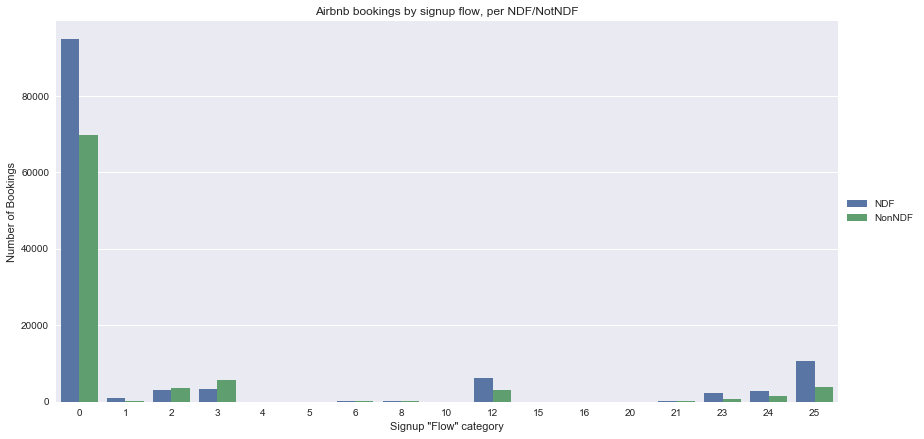

In [28]:
# Language check for NDF
train_users_bin = train_users.copy()
train_users_bin.ix[train_users_bin['country_destination'] != 'NDF', 'country_destination'] = 'NonNDF'

#train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'US']
#train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_bin.groupby(['signup_flow','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['signup_flow'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by signup flow, per NDF/NotNDF')
plt.xlabel('Signup "Flow" category')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

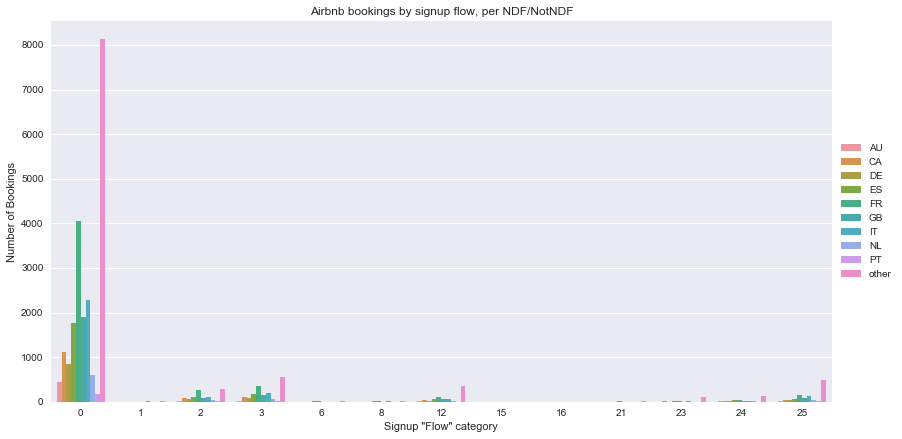

In [70]:
# Language check for NDF
train_users_bin = train_users
#train_users_bin.ix[train_users_bin['country_destination'] != 'NDF', 'country_destination'] = 'NonNDF'

train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'US']
train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_bin.groupby(['signup_flow','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['signup_flow'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by signup flow, per NDF/NotNDF')
plt.xlabel('Signup "Flow" category')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

<br/>
### Device Type - Doesn't seem too useful

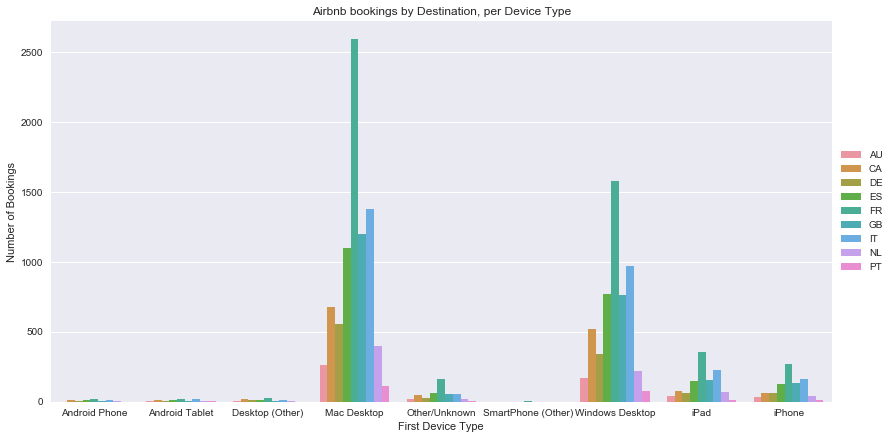

In [76]:
# Language check for NDF
train_users_Non_EN = train_users.copy()
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'US']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'NDF']
train_users_Non_EN = train_users_Non_EN[train_users_Non_EN['country_destination'] != 'other']


plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_Non_EN.groupby(['first_device_type','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['first_device_type'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by Destination, per Device Type')
plt.xlabel('First Device Type')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

<br/>
### Affiliate Provider - May not be useful

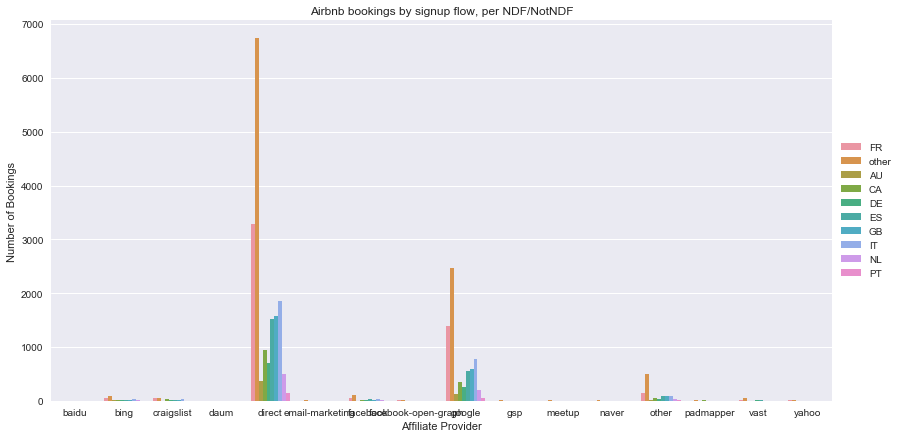

In [82]:
train_users_bin = train_users.copy()
#train_users_bin.ix[train_users_bin['country_destination'] != 'NDF', 'country_destination'] = 'NonNDF'

train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'US']
train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_bin.groupby(['affiliate_provider','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['affiliate_provider'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by signup flow, per NDF/NotNDF')
plt.xlabel('Affiliate Provider')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

<br/>
### Affiliate Channel

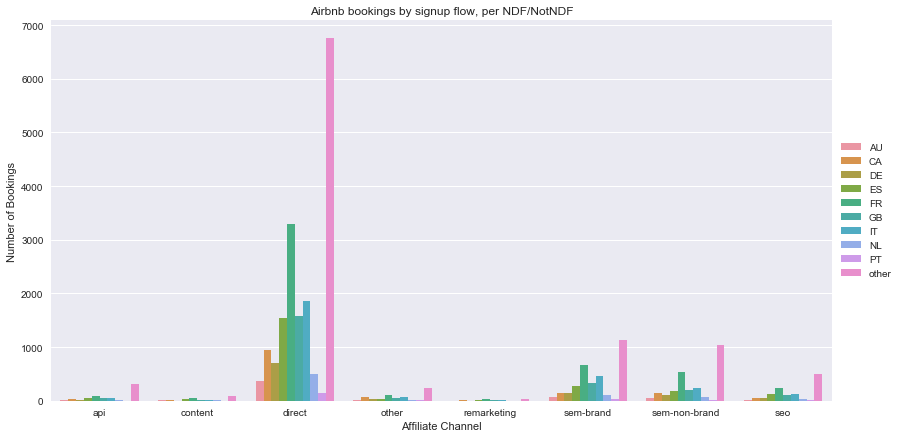

In [34]:
train_users_bin = train_users.copy()
#train_users_bin.ix[train_users_bin['country_destination'] != 'NDF', 'country_destination'] = 'NonNDF'

train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'US']
train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_bin.groupby(['affiliate_channel','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['affiliate_channel'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by signup flow, per NDF/NotNDF')
plt.xlabel('Affiliate Channel')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

<br/>
Signup App

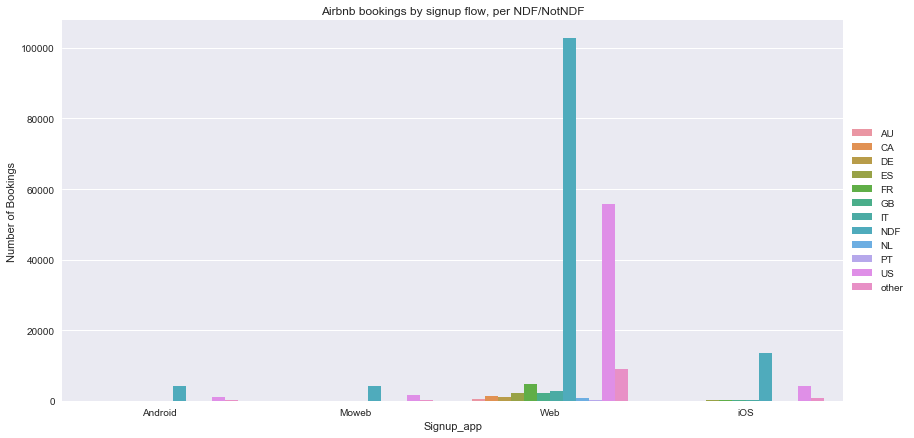

In [40]:
train_users_bin = train_users.copy()
#train_users_bin.ix[train_users_bin['country_destination'] != 'NDF', 'country_destination'] = 'NonNDF'

#train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'US']
#train_users_bin = train_users_bin[train_users_bin['country_destination'] != 'NDF']

plt.rcParams['figure.figsize'] = (14.0, 7.0)
signupDest = pd.DataFrame({'count' : train_users_bin.groupby(['signup_app','country_destination'])['unit'].count()}).reset_index()
sns.barplot(x=signupDest['signup_app'], y=signupDest['count'], hue=signupDest["country_destination"])
plt.title('Airbnb bookings by signup flow, per NDF/NotNDF')
plt.xlabel('Signup_app')
plt.ylabel('Number of Bookings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

<br/>
### Looking into Session Activities

In [4]:
train_users[train_users['id']=='d1mm9tcy42']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
137021,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other


In [5]:
# Get users who did purchase vs not purchased
train_noPurchase = train_users[train_users['country_destination']=='NDF']
noPurchase_users = set(train_noPurchase['id'])

train_yesPurchase = train_users[train_users['country_destination']!='NDF']
yesPurchase_users = set(train_yesPurchase['id'])

In [6]:
# Look at total time spent for now
sessions_noPurchase = sessions[sessions['user_id'].isin(noPurchase_users)]
sessions_yesPurchase = sessions[sessions['user_id'].isin(yesPurchase_users)]

In [17]:
sessions_noPurchase.head(200)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
127,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0
128,yo8nz8bqcq,create,submit,create_user,Mac Desktop,NaN
129,yo8nz8bqcq,confirm_email,click,confirm_email_link,Mac Desktop,115983.0
130,yo8nz8bqcq,show,view,p3,Mac Desktop,20285.0
131,yo8nz8bqcq,show_personalize,data,user_profile_content_update,Mac Desktop,3255.0
132,yo8nz8bqcq,show,view,user_profile,Mac Desktop,47308.0
133,yo8nz8bqcq,header_userpic,data,header_userpic,Mac Desktop,14156.0
134,yo8nz8bqcq,personalize,data,wishlist_content_update,Mac Desktop,36.0
135,yo8nz8bqcq,show,NaN,NaN,Mac Desktop,4080.0
136,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0


In [19]:
### WIP here ###
noPurchase_count = sessions_noPurchase[np.isfinite(sessions_noPurchase['secs_elapsed'])]
noPurchase_count = pd.DataFrame({'count' : noPurchase_count.groupby(['user_id'])['secs_elapsed'].sum()}).reset_index()
noPurchase_count.tail()

#df = df[np.isfinite(df['EPS'])]

#sns.barplot(x=age_count['country_destination'], y=age_count['count'],hue=age_count["age_bucket"])
#plt.xlabel('Country')
#plt.ylabel('Population in Thousands')
#sns.despine()

,user_id,count
44217,zzvg4emw5w,3065929.0
44218,zzw7kydxfa,1031.0
44219,zzx5wp3lqu,515737.0
44220,zzysuoqg6x,1731.0
44221,zzywmcn0jv,2149949.0


In [26]:
npCounter = Counter(sessions_noPurchase['action'])
denom = float(sum(npCounter.values()))
for i in npCounter:
    npCounter[i] /= denom
npCounter.most_common()

[('show', 0.24657439717958865),
 ('index', 0.08298432487057307),
 ('personalize', 0.07780888311841215),
 ('search_results', 0.0742447779547439),
 ('similar_listings', 0.05250988484846503),
 ('ajax_refresh_subtotal', 0.051906492113378964),
 ('update', 0.04652337860686592),
 ('search', 0.04586896729905714),
 ('social_connections', 0.03209591491671872),
 ('lookup', 0.02417855192284422),
 ('reviews', 0.022120475780894853),
 ('active', 0.01867050832158707),
 ('header_userpic', 0.01575133024387532),
 ('create', 0.015114579211239784),
 ('collections', 0.013628826801756871),
 ('dashboard', 0.011623404443194417),
 ('track_page_view', 0.010832943608125034),
 ('campaigns', 0.00855018952091598),
 ('edit', 0.007743049537071861),
 ('unavailabilities', 0.007420913036226457),
 (nan, 0.007226977051453538),
 ('calendar_tab_inner2', 0.006334806113071547),
 ('ajax_check_dates', 0.00603098397166507),
 ('confirm_email', 0.005469779671715107),
 ('listings', 0.005419088141125221),
 ('notifications', 0.0052238

In [27]:
ypCounter = Counter(sessions_yesPurchase['action'])
denom = float(sum(ypCounter.values()))
for i in ypCounter:
    ypCounter[i] /= denom
ypCounter.most_common()

[('show', 0.22092598035598873),
 ('personalize', 0.0854092354511466),
 ('index', 0.08440731910974995),
 ('search_results', 0.07768177927440291),
 ('ajax_refresh_subtotal', 0.06332070959061739),
 ('similar_listings', 0.059424323464558164),
 ('search', 0.02684410060772173),
 ('update', 0.025747435638466654),
 ('lookup', 0.025110805496388063),
 ('social_connections', 0.019040442343040833),
 ('create', 0.015583125390334109),
 ('dashboard', 0.015530308070123662),
 ('header_userpic', 0.014802557971040787),
 ('reviews', 0.0130474908345822),
 ('edit', 0.013037411193320666),
 ('track_page_view', 0.01218185124304152),
 ('requested', 0.011914539156785595),
 (nan, 0.011867366435681608),
 ('active', 0.011320243508005453),
 ('qt2', 0.010449765688659234),
 ('calendar_tab_inner2', 0.007837122673669195),
 ('collections', 0.007798820036875359),
 ('ajax_check_dates', 0.007401682171170855),
 ('confirm_email', 0.007199686160289681),
 ('identity', 0.007082762321655867),
 ('ask_question', 0.00638686388895944

In [35]:
counterDiff = ypCounter - npCounter
counterDiff.most_common()
#list(reversed(counterDiff.most_common()))

[('ajax_refresh_subtotal', 0.011414217477238427),
 ('requested', 0.010589364434526126),
 ('personalize', 0.007600352332734456),
 ('similar_listings', 0.006914438616093137),
 ('qt2', 0.0059879298703507606),
 ('edit', 0.0052943616562488045),
 (nan, 0.0046403893842280695),
 ('travel_plans_current', 0.004041761926520081),
 ('identity', 0.003933019540293344),
 ('dashboard', 0.003906903626929244),
 ('complete_status', 0.0034831697094757433),
 ('search_results', 0.0034370013196590027),
 ('pending', 0.002890435606785635),
 ('verify', 0.002391134747191806),
 ('edit_verification', 0.0022119770543103296),
 ('ajax_photo_widget_form_iframe', 0.001971176325776838),
 ('confirm_email', 0.0017299064885745738),
 ('show_personalize', 0.001726650625764715),
 ('cancellation_policies', 0.0016193462374590704),
 ('calendar_tab_inner2', 0.0015023165605976482),
 ('index', 0.0014229942391768835),
 ('ask_question', 0.0013909682677265634),
 ('ajax_check_dates', 0.0013706981995057852),
 ('track_page_view', 0.001348

### Counting

In [24]:
Counter(train_users['signup_method']).most_common()

[('basic', 152897), ('facebook', 60008), ('google', 546)]

In [23]:
Counter(train_users['first_device_type']).most_common()

[('Mac Desktop', 89600),
 ('Windows Desktop', 72716),
 ('iPhone', 20759),
 ('iPad', 14339),
 ('Other/Unknown', 10667),
 ('Android Phone', 2803),
 ('Android Tablet', 1292),
 ('Desktop (Other)', 1199),
 ('SmartPhone (Other)', 76)]

In [19]:
Counter(train_users['first_browser']).most_common()

[('Chrome', 63845),
 ('Safari', 45169),
 ('Firefox', 33655),
 ('-unknown-', 27266),
 ('IE', 21068),
 ('Mobile Safari', 19274),
 ('Chrome Mobile', 1270),
 ('Android Browser', 851),
 ('AOL Explorer', 245),
 ('Opera', 188),
 ('Silk', 124),
 ('Chromium', 73),
 ('BlackBerry Browser', 53),
 ('Maxthon', 46),
 ('Apple Mail', 36),
 ('IE Mobile', 36),
 ('Sogou Explorer', 33),
 ('Mobile Firefox', 30),
 ('SiteKiosk', 24),
 ('RockMelt', 24),
 ('Iron', 17),
 ('IceWeasel', 13),
 ('Pale Moon', 12),
 ('CometBird', 11),
 ('SeaMonkey', 11),
 ('Yandex.Browser', 11),
 ('Camino', 9),
 ('TenFourFox', 8),
 ('wOSBrowser', 6),
 ('CoolNovo', 6),
 ('Avant Browser', 4),
 ('Opera Mini', 4),
 ('Mozilla', 3),
 ('TheWorld Browser', 2),
 ('Comodo Dragon', 2),
 ('OmniWeb', 2),
 ('SlimBrowser', 2),
 ('Opera Mobile', 2),
 ('Flock', 2),
 ('Crazy Browser', 2),
 ('Stainless', 1),
 ('Outlook 2007', 1),
 ('Epic', 1),
 ('PS Vita browser', 1),
 ('Kindle Browser', 1),
 ('Palm Pre web browser', 1),
 ('Conkeror', 1),
 ('IceDragon',

In [20]:
Counter(train_users['country_destination']).most_common()

[('NDF', 124543),
 ('US', 62376),
 ('other', 10094),
 ('FR', 5023),
 ('IT', 2835),
 ('GB', 2324),
 ('ES', 2249),
 ('CA', 1428),
 ('DE', 1061),
 ('NL', 762),
 ('AU', 539),
 ('PT', 217)]

In [21]:
Counter(train_users['signup_method']).most_common()

[('basic', 152897), ('facebook', 60008), ('google', 546)]

In [26]:
Counter(train_users['first_affiliate_tracked']).most_common()

[('untracked', 109232),
 ('linked', 46287),
 ('omg', 43982),
 ('tracked-other', 6156),
 (nan, 6065),
 ('product', 1556),
 ('marketing', 139),
 ('local ops', 34)]

In [36]:
Counter(train_users['signup_app']).most_common()

[('Web', 182717), ('iOS', 19019), ('Moweb', 6261), ('Android', 5454)]

In [37]:
Counter(train_users['signup_flow']).most_common()

[(0, 164739),
 (25, 14659),
 (12, 9329),
 (3, 8822),
 (2, 6881),
 (24, 4328),
 (23, 2835),
 (1, 1047),
 (6, 301),
 (8, 240),
 (21, 196),
 (5, 36),
 (20, 14),
 (16, 11),
 (15, 10),
 (10, 2),
 (4, 1)]

#### Gender / Age

In [43]:
age_gender_bkts_path = '../../Data/age_gender_bkts.csv'

In [57]:
countries = set(train_users['country_destination'])
ageBuckets = set(age_gender_pd['age_bucket'])

In [52]:
age_gender_pd = pd.read_csv(age_gender_bkts_path)
age_gender_pd[age_gender_pd['country_destination'] == 'AU']

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


#### Actions List

In [89]:
set(sessions['action'])

{nan,
 '10',
 '11',
 '12',
 '15',
 'about_us',
 'accept_decline',
 'account',
 'acculynk_bin_check_failed',
 'acculynk_bin_check_success',
 'acculynk_load_pin_pad',
 'acculynk_pin_pad_error',
 'acculynk_pin_pad_inactive',
 'acculynk_pin_pad_success',
 'acculynk_session_obtained',
 'active',
 'add_business_address_colorbox',
 'add_guest_colorbox',
 'add_guests',
 'add_note',
 'agree_terms_check',
 'agree_terms_uncheck',
 'airbnb_picks',
 'airbrb',
 'ajax_check_dates',
 'ajax_get_referrals_amt',
 'ajax_get_results',
 'ajax_google_translate',
 'ajax_google_translate_description',
 'ajax_google_translate_reviews',
 'ajax_image_upload',
 'ajax_ldp',
 'ajax_lwlb_contact',
 'ajax_payout_edit',
 'ajax_payout_options_by_country',
 'ajax_payout_split_edit',
 'ajax_photo_widget',
 'ajax_photo_widget_form_iframe',
 'ajax_price_and_availability',
 'ajax_referral_banner_experiment_type',
 'ajax_referral_banner_type',
 'ajax_refresh_subtotal',
 'ajax_send_message',
 'ajax_special_offer_dates_availabl

In [24]:
len(set(sessions['action']))

360

0         gxn3p5htnn
1         820tgsjxq7
2         4ft3gnwmtx
3         bjjt8pjhuk
4         87mebub9p4
5         osr2jwljor
6         lsw9q7uk0j
7         0d01nltbrs
8         a1vcnhxeij
9         6uh8zyj2gn
10        yuuqmid2rp
11        om1ss59ys8
12        k6np330cm1
13        dy3rgx56cu
14        ju3h98ch3w
15        v4d5rl22px
16        2dwbwkx056
17        frhre329au
18        cxlg85pg1r
19        gdka1q5ktd
20        qdubonn3uk
21        qsibmuz9sx
22        80f7dwscrn
23        jha93x042q
24        7i49vnuav6
25        al8bcetz0g
26        bjg0m5otl3
27        hfrl5gle36
28        tp6x3md0n4
29        hql77nu2lk
             ...    
213421    c98s3h7kgj
213422    ytmpiwb8hj
213423    3dx1jk6yk2
213424    hcfj07iowv
213425    l1f71f9vsj
213426    15bj4ahmhf
213427    qwpybxfjdl
213428    k4t61wuvyq
213429    mhh7b52z44
213430    79wk7k2k5t
213431    ftwmocvwlq
213432    rg7ayg1tob
213433    2f24umzkuv
213434    or77n2ojuj
213435    0a5bnb9bs4
213436    6fzrn49sfn
213437    r0j

In [ ]:
train_noPurchase = train_users[train_users['country_destination']=='NDF']
no_users = set(train_users['id'])

train_yesPurchase = train_users[train_users['country_destination']!='NDF']
yesPurchase_users = set(train_yesPurchase['id'])

In [30]:
test_check = test_users
test_users = set(test_check['id'])

In [31]:
sessions_check = sessions[~sessions['user_id'].isin(noPurchase_users)]
sessions_check = sessions_check[~sessions_check['user_id'].isin(yesPurchase_users)]
sessions_check = sessions_check[~sessions_check['user_id'].isin(test_users)]

In [ ]:


sessions_check = sessions_check[~sessions_check['user_id'].isin(test_users)]

In [32]:
list(set(sessions_check['user_id']))

[nan]

In [21]:
'x75prrjkez' in set(noPurchase_users)

False

In [22]:
'x75prrjkez' in set(yesPurchase_users)

False

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [59]:
### are all users in test in sessions
test_ids = set(test_users['id'])
sessions_ids = set(sessions['user_id'])

In [62]:
set().intersection(*[list(test_ids), list(sessions_ids)])

set()

In [63]:
check = True
for u in test_ids:
    if u not in sessions_ids:
        check = False
check

False

In [71]:
train_nonNDS = train_users[train_users['country_destination'] != 'NDF']

In [101]:
print(sum(~(train_users['id'].drop_duplicates().isin(sessions['user_id'].drop_duplicates()))))
print(len(train_users['id'].drop_duplicates()))

139636
213451


In [86]:
print(sum(~(test_users['id'].drop_duplicates().isin(sessions['user_id'].drop_duplicates()))))
print(len(test_users['id'].drop_duplicates()))

428
62096


In [100]:
train_id_in_session = train_users[(train_users['id'].drop_duplicates().isin(sessions['user_id'].drop_duplicates()))]
print(len(train_id_in_session[train_id_in_session['country_destination'] != 'NDF']))
print(len(train_id_in_session[train_id_in_session['country_destination'] == 'NDF']))
28774 / float(28774+ 45041)

28774
45041


0.3898123687597372

In [96]:
train_id_in_session = train_users[~(train_users['id'].drop_duplicates().isin(sessions['user_id'].drop_duplicates()))]
train_id_in_session
len(train_id_in_session[train_id_in_session['country_destination'] != 'NDF'])

60134

In [77]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,unit
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1.0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1.0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1.0
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1.0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1.0
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,1.0
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1.0
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,1.0


In [79]:
len(train_users)

213451

In [110]:
train_users_NU = train_users[train_users['country_destination'] != 'NDF']
train_users_NU = train_users_NU[train_users_NU['country_destination'] != 'US']

In [29]:
set(train_users['country_destination'])

{'AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US', 'other'}

In [104]:
sessions[train_ids_in_sessions]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0
